> #### Resolution of the DNA methylation state of single CpG dyads using in silico strand annealing and WGBS data
Nature protocol | https://www.nature.com/articles/s41596-018-0090-x

<!-- > - Whole-genome bisulfite sequencing (WGBS) has been widely used to quantify cytosine DNA methylation frequency in an expanding array of cell and tissue types. Because of the denaturing conditions used, this method ultimately leads to the measurement of methylation frequencies at single cytosines. 
> - Hence, the methylation frequency of CpG dyads (two complementary CG dinucleotides) can be only indirectly inferred by overlaying the methylation frequency of two cytosines measured independently. 
> - Furthermore, hemi-methylated CpGs (hemiCpGs) have not been previously analyzed in WGBS studies. We recently developed in silico strand annealing (iSA), a bioinformatics method applicable to WGBS data, to resolve the methylation status of CpG dyads into __unmethylated__, __hemi-methylated__, and __methylated__. 
> - HemiCpGs account for 4–20% of the DNA methylome in different cell types, and some can be inherited across cell divisions, suggesting a role as a stable epigenetic mark. Therefore, it is important to resolve hemiCpGs from fully methylated CpGs in WGBS studies. This protocol describes step-by-step commands to accomplish this task, including dividing alignments by strand, pairing alignments between strands, and extracting single-fragment methylation calls. 
> - The versatility of iSA enables its application downstream of other WGBS-related methods such as nasBS-seq (nascent DNA bisulfite sequencing), ChIP-BSseq (ChIP followed by bisulfite sequencing), TAB-seq, oxBS-seq, and fCAB-seq. iSA is also tunable for analyzing the methylation status of cytosines in any sequence context. 
> - We exemplify this flexibility by uncovering the single-fragment non-CpG methylome. 
> - This protocol provides enough details for users with little experience in bioinformatic analysis and takes 2–7 h. -->

> #### Extended-representation bisulfite sequencing of gene regulatory elements in multiplexed samples and single cells
https://www.nature.com/articles/s41587-021-00910-x

Data: [GSE149954](https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE149954)
- [HL60 Bisulfite-Seq - 10ng dmso](https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSM4518676)
- [HL60 Bisulfite-Seq - 10ng decitabine](https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSM4518677)

___
<!-- > - Before alignment, primer dimers were filtered using Cutadapt version 2.7 and the following parameters: `--discard -a GCTCTTCCGATCT`. Short read pairs were trimmed using Trim Galore version 0.6.5 and the following parameters: `--paired --illumina --nextseq 20`. 
> - High-quality sequencing reads were then aligned to an in silico bisulfite-converted reference genome (hg38 and mm10) using methylCtools version 1.0.0 (https://github.com/hovestadt/methylCtools, ref. 49) and bwa mem version 0.7.17. 
> - Sorted alignments were further processed to only maintain uniquely mapped read pairs with a mapping score ≥1, that were mapping to an MspI cut site and that had an insert size between 20 bp and 600 bp. Putative PCR duplicates were removed by considering the outer mapping position of both paired-end reads (read 2 being located at the MspI cut site and read 1 being located at variable positions), as well as the random hexamer sequence that was trimmed before alignment and functions as a UMI. For library complexity analysis, alignments were downsampled before this step. 
> - We note that multiple random hexamer priming events during the second-strand synthesis step might lead to additional sequencing reads from the same original fragment that cannot be identified using this approach. DNA methylation calling was performed using methylCtools bcall and the --trimPE parameter. Detailed quality metrics for each library are provided in Supplementary Table 1. DNA methylation values were deposited in the GEO (GSE149954) for all samples reported in this study.


 -->
 
<!--  This is simply called RRBS protocol :) -->

> #### Detection of differentially methylated regions from whole-genome bisulfite sequencing data without replicates
https://pubmed.ncbi.nlm.nih.gov/26184873/
> - https://bioconductor.org/packages/release/bioc/vignettes/DSS/inst/doc/DSS.html
> - Developed by https://www.haowulab.org/

<!-- ___ 
- my old notebook based on `DESeq2` (version v1.20) - https://github.com/goodarzilab/Abe/blob/master/People/Kivanc/notebook.ipynb

- convert `edgeR` to  object https://bioconductor.org/packages/devel/bioc/vignettes/DEFormats/inst/doc/DEFormats.html#dgelist-to-deseqdataset -->



> #### Y disruption, autosomal hypomethylation and poor male lung cancer survival
https://www.nature.com/articles/s41598-021-91907-8
> - Analysis of WGBS-Seq data was performed with GenPipes47. The standard GenPipe for methylation analysis Methyl-Seq is adapted from the Bismark pipeline. Alignment was performed with bismark (0.18.1) and bowtie2 (2.3.1) according to bismark user guide manual with default options. SAM files thus obtained per sample were sorted by chromosomic location with GATK (Genome Analysis Tool Kit) (3.7) and read alignments deemed to be PCR duplicates were removed with Picard (2.9.0). Bismark methylation extractor was used to extract methylation in CpG context. Methylkit R package (1.12.0) was used to obtain median methylation per sample and clustering based on methylation profiles.
> - Calling of Differentially Methylated Regions (DMRs) was performed with Dispersion Shrinkage for Sequencing data with single replicates (DSS-single)48 implemented in the DSS Bioconductor R package (2.34.0) which takes into account spatial correlation, read depth and biological variation between groups. DMRs were called using the criterion absolute methylation differences > 20% and P < 0.001.

> - Coordinates 1 Kb upstream hg19 Ensembl genes were downloaded from UCSC Table Browser to obtain promoter genomic regions. Proximity of DMRs to promoter regions was analysed with Bedtools’ IntersectbED49. Then, enriched TF binding motifs in the genomic regions of promoters were identified by employing the motif enrichment algorithm in the HOMER (4.9.1) tool50. CpG normalization and use of the repeat-masked sequence were the options given for finding enriched motifs in the genomic regions given.

> - In order to avoid any confounding influence of low chromosome Y read depth on the measurement of Y chromosome DNA methylation, the analysis was restricted to the autosomes.

In [1]:
library(methylKit)
library(DSS)
library(edgeR)
library(tidyverse)
library(ggrepel)
library(patchwork)
library(genomation)
library(GenomicFeatures)
library(ORFik)

Loading required package: GenomicRanges

Loading required package: stats4

Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rownames, sapply, setdiff, sort, table, tapply,
    union, unique, unsplit, which.max, which.min


Loading required package: S4Vectors


Attaching package: ‘S4Vectors’


The following objects are masked from ‘package:base’:

    expand.grid, I, unname


Loading required package: IRanges

Loading required package: GenomeInfoDb

Loading required package: Biobase

Welcome to Bioconductor

    Vignettes contain 

In [93]:
library(ggExtra)

In [2]:
source('../scripts/util.R')

## methylKit

- https://github.com/al2na/methylKit
- https://bioconductor.org/packages/release/bioc/html/genomation.html
- https://www.slideshare.net/AlexanderGosdschan/eurobioc-2018-metyhlkit-overview

#### DNA methylation

> - DNA methylation in vertebrates typically occurs at CpG dinucleotides, however non-CpG Cs are also methylated in certain tissues such as embryonic stem cells. DNA methylation can act as an epigenetic control mechanism for gene regulation. Methylation can hinder binding of transcription factors and/or methylated bases can be bound by methyl-binding-domain proteins which can recruit chromatin remodeling factors. 
> - In both cases, the transcription of the regulated gene will be effected. In addition, aberrant DNA methylation patterns have been associated with many human malignancies and can be used in a predictive manner. In malignant tissues, DNA is either hypo-methylated or hyper-methylated compared to the normal tissue. The location of hyper- and hypo-methylated sites gives a distinct signature to many diseases. 
> - Traditionally, hypo-methylation is associated with gene transcription (if it is on a regulatory region such as promoters) and hyper-methylation is associated with gene repression.

In [3]:
filtere_obj <- function(myobj){
    filtered.myobj=filterByCoverage(myobj,lo.count=10,lo.perc=NULL,
                                    hi.count=NULL,hi.perc=99.9)
    return(filtered.myobj)
    }

> ### Reading processed Bismark files 
> Bismark aligner scripts can produce per base methylation files. These files, namely "cytosine report"  and "coverage" files can be read in R using methylKit methRead() function. See Bismark manual for details on the files.


In [4]:
files = list.files('bismark/',pattern='srt.bam',full.names = TRUE) %>% as.list

In [5]:
# meth = methylKit::processBismarkAln(
#     files,
#     sample.id=list('DMSO',"Decitabine"),
#     assembly="hg38",
#     save.folder='methylKit',
#     save.context=NULL,
#     read.context="CpG",
#     nolap=FALSE,mincov=10,minqual=20,phred64=FALSE,
#     treatment=c(0,1)
# )

In [6]:
# saveRDS(meth, file = "methylKit/meth.rds")

In [7]:
meth <- readRDS(file = "methylKit/meth.rds")

#### Descriptive statistics on samples

In [8]:
pdf(file = "plots/MethylationStatsDMSO.pdf",   
    # The directory you want to save the file in
    width = 5, # The width of the plot in inches
    height = 5) # The height of the plot in inches

getMethylationStats(meth[[1]],plot=TRUE,both.strands=FALSE)

# Step 3: Run dev.off() to create the file!
dev.off()

png 
  2

In [9]:
pdf(file = "plots/MethylationStatsDAC.pdf",   
    # The directory you want to save the file in
    width = 5, # The width of the plot in inches
    height = 5) # The height of the plot in inches

getMethylationStats(meth[[2]],plot=TRUE,both.strands=FALSE)

# Step 3: Run dev.off() to create the file!
dev.off()

png 
  2

#### Filtering samples based on read coverage

In [10]:
meth1 = filtere_obj(meth)

#### Merging samples

In [11]:
meth_merged=methylKit::unite(meth1, destrand=FALSE)

uniting...



In [12]:
pdf(file = "plots/MethylationCorrelation.pdf",   
    # The directory you want to save the file in
    width = 5, # The width of the plot in inches
    height = 5) # The height of the plot in inches

getCorrelation(meth_merged,plot=TRUE)

# Step 3: Run dev.off() to create the file!
dev.off()

                DMSO Decitabine
DMSO       1.0000000  0.9168043
Decitabine 0.9168043  1.0000000


png 
  2

### tileMethylCounts

> #### CpG Island
> CpG islands are defined as stretches of DNA 500–1500 bp long with a CG: GC ratio of more than 0.6, and they are normally found at promoters and contain the 5′ end of the transcript (reviewed in Cross and Bird, 1995).



In [689]:
tiles = tileMethylCounts(meth,win.size=1000,step.size=1000,cov.bases=0)

In [690]:
tiles_merged=methylKit::unite(tiles, destrand=FALSE)

uniting...



In [695]:
# tiles_merged %>% head

### Finding differentially methylated bases or regions

In [21]:
myDiff=calculateDiffMeth(meth_merged)

two groups detected:
 will calculate methylation difference as the difference of
treatment (group: 1) - control (group: 0)


 NOTE: performing 'fast.fisher' instead of 'F' for two groups testing.



In [692]:
myDiff_tiles=calculateDiffMeth(tiles_merged)

two groups detected:
 will calculate methylation difference as the difference of
treatment (group: 1) - control (group: 0)


 NOTE: performing 'fast.fisher' instead of 'F' for two groups testing.



### Annotating differential methylation events 
https://www.biostars.org/p/436554/

In [111]:
# Gene annotation
meth_merged_ann = cbind(meth_merged,nearestTSS(meth_merged$chr, meth_merged$start) %>% rename(tss.strand=strand))

In [399]:
# Gene annotation
myDiffTop_ann = cbind(myDiffTop,nearestTSS(myDiffTop$chr, myDiffTop$start) %>% rename(tss.strand=strand)) %>% dplyr::select(!c(gene_id,width))

In [400]:
myDiffTop_ann %>% head

,chr,start,end,strand,pvalue,qvalue,meth.diff,symbol,tss,tss.strand,distance
,<chr>,<int>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<int>,<chr>,<int>
1,chr1,976414,976414,+,0.342857143,0.8042440,8.333333,PERM1,981173,-,-4759
2,chr1,976423,976423,+,0.388888889,0.8050610,7.142857,PERM1,981173,-,-4750
4,chr1,1045054,1045054,+,0.306429203,0.7677611,-19.473684,AGRN,1033993,+,-11061
5,chr1,1045059,1045059,+,0.029556650,0.2946410,-30.000000,AGRN,1033993,+,-11066
6,chr1,1070497,1070497,+,0.009963665,0.2043508,-45.714286,LOC105378948,1069337,-,1160
7,chr1,1070525,1070525,+,0.051955742,0.3752606,-30.000000,LOC105378948,1069337,-,1188


In [696]:
tiles_merged_ann = cbind(tiles_merged,nearestTSS(tiles_merged$chr, tiles_merged$start) %>% rename(tss.strand=strand))

In [697]:
# Gene annotation
myDiff_tiles_ann = cbind(myDiff_tiles,nearestTSS(myDiff_tiles$chr, myDiff_tiles$start) %>% rename(tss.strand=strand)) %>% dplyr::select(!c(gene_id,width))

In [823]:
myDiff_tiles_ann %>% dplyr::filter(symbol %in% c('BCL2') & pvalue < 0.05)

chr,start,end,strand,pvalue,qvalue,meth.diff,symbol,tss,tss.strand,distance
<fct>,<int>,<int>,<fct>,<dbl>,<dbl>,<dbl>,<chr>,<int>,<chr>,<int>
chr18,63220001,63221000,*,0.0057227796,0.035811868,-45.45455,BCL2,63319769,-,-99768
chr18,63310001,63311000,*,0.0005050621,0.006730832,-35.33654,BCL2,63319769,-,-9768


In [891]:
myDiff_tiles_ann %>% as.data.frame %>% 
    write.table(file = "delta_DNAme_table.txt", sep = "\t",row.names = FALSE,quote=FALSE)

### Volcano plot

In [ ]:
plot_hyperhypo <- function (res, meth.diff.cutoff, pvalue.cutoff, title='', x_lim=FALSE,y_lim=NA,alpha = 5/10, size = 3) {
    if (x_lim==FALSE){
        x_min = res$meth.diff %>% min
        x_max = res$meth.diff %>% max
    } else if (length(x_lim)==2) {
        x_min = x_lim[1]
        x_max = x_lim[2]
    }
    colors_values = c("grey80", "#FF4500") # https://www.rapidtables.com/web/color/RGB_Color.html

    w <- wilcox.test(res$meth.diff, mu=-5, alternative = "less")
    t <- t.test(res$meth.diff, mu=-5, alternative = "less")
    
    res$sig <- as.factor(res$pvalue < pvalue.cutoff & abs(res$meth.diff) > meth.diff.cutoff)
    relevel(res$sig, ref=TRUE)
    
    vol <- res %>% ggplot(aes(x = meth.diff, y = -log10(pvalue))) + 
        geom_point(
            data = res %>% filter(
                abs(meth.diff) >= meth.diff.cutoff, 
                pvalue < pvalue.cutoff), 
            aes(x = meth.diff, y = -log10(pvalue)), 
            size = size, alpha = alpha, shape = 21, 
            color = colors_values[2],
            fill = colors_values[2]) + 

        geom_point(
            data = res %>% filter(
                (abs(meth.diff) < meth.diff.cutoff) | 
                (pvalue >= pvalue.cutoff)), 
            aes(x = meth.diff, y = -log10(pvalue)), 
            size = 1, alpha = alpha, 
            shape = 21, color = colors_values[1], 
            fill = colors_values[1]) + 
        
        geom_rug(
            data = res %>% filter(
                abs(meth.diff) >= meth.diff.cutoff, 
                pvalue < pvalue.cutoff), 
            alpha = alpha,
            sides = "b", colour= colors_values[2]) + 

        xlim(c(x_min, x_max)) + 
        ylim(c(0, y_lim)) + 
        # ylim(c(0, -log10(res %>% select(pvalue) %>% min ))) + 
        geom_hline(yintercept = -log10(pvalue.cutoff), linetype = "dashed", alpha = 5/10) + 
        ggtitle(title) +
        geom_text(aes(
            x_max*0.5,-log10(pvalue.cutoff)/1000,
            label = sprintf(
                "\n[mu=-5,alter=less]\nwilcox.test (-log10 p.value): %.2f\nt.test (-log10 p.value):%.2f",
                -log10(w$p.value), -log10(t$p.value)),
            vjust = x_min*0.05
        )) +
        theme(
            legend.position = "none"
        ) + 
        theme_Publication()
    return(vol)
}

In [ ]:
ls 

In [ ]:
vol = myDiff_tiles_ann %>% plot_hyperhypo(5,0.01,title='Bisulfite-seq\nDecitabine vs. DMSO',x_lim=c(-110,110)) +
    scale_y_sqrt(limits=c(0,20))

In [ ]:
vol

In [808]:
ggsave('plots/diff-DNAme-volcano.pdf',vol,width=8,height=7)

> https://www.nature.com/articles/s42003-021-01661-w#MOESM2

> Promoters are defined as 2 kb flanking the transcription start sites of genes (gencode basic). CGI
promoters (orange) were obtained by merging intervals of promoters with overlapping
CGIs (UCSC) while the residual promoters are defined as non-CGI promoters (violet).
CGIs not overlapping with any promoter regions were defined as orphan CGIs (yellow).
Exons (green) and introns (red) are obtained by subtracting CGI promoters and nonCGI promoters from gene exons and introns. All other regions are defined as intergenic
(blue).

#### Finding differentially methylated promoters

In [762]:
# PromCpG <- findOverlaps(
#     myDiff_tiles %>% GRanges,
#     myDiff_tiles_ann %>% dplyr::filter(distance > -2500 & distance < 2500) %>% GRanges
# )

In [765]:
res_promoters = myDiff_tiles_ann %>% dplyr::filter(distance > -2500 & distance < 2500) #%>% GRanges

In [418]:
# res_promoters %>% as.data.frame %>% 
#     write.table(file = "meth_prmoters_diff.txt", sep = "\t",row.names = FALSE,quote=FALSE)

In [419]:
# res_promoters$symbol %>% unique %>% length == res_promoters$symbol %>% length

In [230]:
# # labels = res_promoters[(abs(res_promoters$meth.diff) > 40) & (res_promoters$pvalue < 0.001),] %>% rownames

# res_promoters %>% plot_Volcano(20,0.05,title='CpG in Promoter\nDecitabine vs. DMSO') 

# #+ 
#         # geom_point(
#         #     data = res_promoters[labels,],
#         #     aes(x = meth.diff, y = -log10(pvalue)), 
#         #     shape = 21, size = 3, color = "grey40", fill = "red3") + 
#         # geom_label_repel(
#         #     data = res_promoters[labels,],
#         #     # data = res_promoters %>% filter(symbol %in% labels), 
#         #     aes(label = symbol), box.padding = 1, max.overlaps = Inf)

Warning message in if (x_lim == FALSE) {:
“the condition has length > 1 and only the first element will be used”
Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.



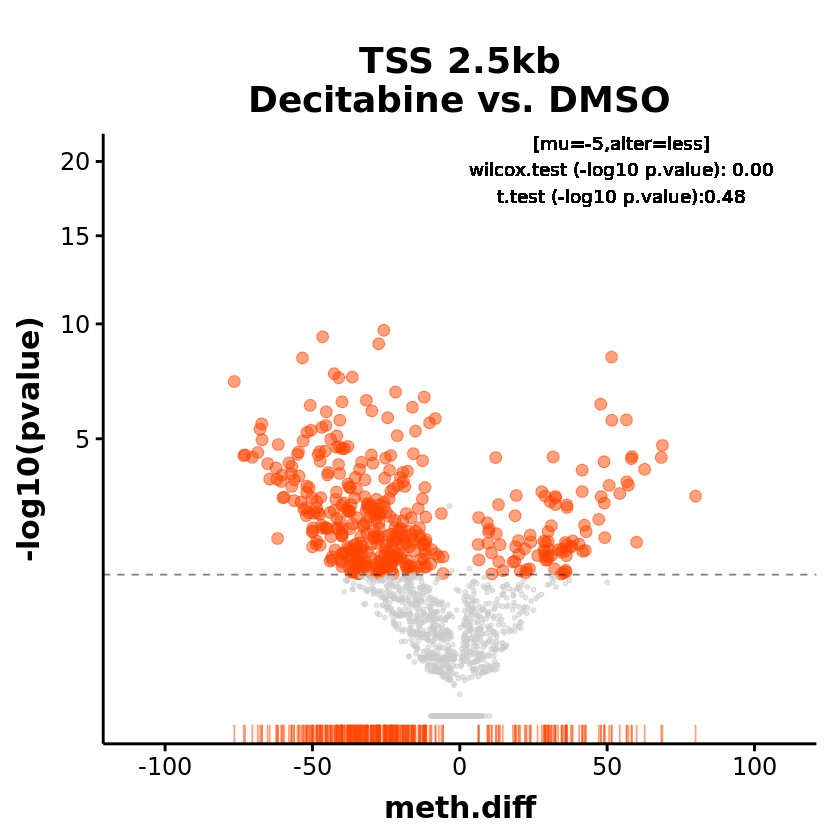

In [878]:
res_promoters %>% plot_hyperhypo(5,0.05,title='TSS 2.5kb\nDecitabine vs. DMSO',x_lim=c(-110,110)) +
    scale_y_sqrt(limits=c(0,20))

In [833]:
# myDiffTop_ann[myDiffTop_ann$symbol %in% RNAme_hypo,] %>% plot_hyperhypo(meth.diff.cutoff,pvalue.cutoff,title='Hypo RNAme')
# + 
    # geom_point(
    #     data = res_promoters %>% filter(
    #             abs(meth.diff) >= meth.diff.cutoff, 
    #             pvalue < pvalue.cutoff), 
    #     aes(x = meth.diff, y = -log10(pvalue)),
    #     shape = 21, size = 3, color = "black", fill = "red1"
    # ) + 
    #     geom_rug(
    #         data = res_promoters %>% filter(
    #             abs(meth.diff) >= meth.diff.cutoff, 
    #             pvalue < pvalue.cutoff), 
    #         sides = "b", colour= 'red1')

# ggsave('diff-DNAme-volcano.pdf',width=8,height=7)

#### Finding differentially methylated enhancers

In [ ]:
SupEnh = read.csv('SE_02_1028_SE_hg38.bed',sep='\t',header=T) %>% GRanges

SupEnh_ol <- findOverlaps(
    SupEnh,
    myDiff_tiles_ann %>% GRanges
)

myDiff_tiles_ann_gr = myDiff_tiles_ann %>% GRanges

In [ ]:
ls 

In [ ]:
SupEnhCpG = cbind(
    myDiff_tiles_ann_gr[queryHits(SupEnh_ol)] %>% data.frame, 
    SupEnh[queryHits(SupEnh_ol)] %>% data.frame %>% dplyr::rename(se_start=start,se_end=end,se_chr=chr)
)

In [ ]:
SupEnhCpG %>% dplyr::select(start,end,se_start,se_end)

### Focus on gene lists

In [887]:
smaller_volcano <- function(genes,title){
    v = myDiff_tiles_ann[myDiff_tiles_ann$symbol %in% genes,] %>% 
        plot_hyperhypo(5,0.05,title=title,x_lim=c(-100,100),y_lim=7) +
        geom_point(
            data = res_promoters[res_promoters$symbol %in% genes,] %>% filter(
                    abs(meth.diff) >= meth.diff.cutoff, 
                    pvalue < pvalue.cutoff), 
            aes(x = meth.diff, y = -log10(pvalue)),
            shape = 21, size = 4, color = "black", fill = "red"
        ) + geom_rug(
                data = res_promoters[res_promoters$symbol %in% genes,] %>% filter(
                    abs(meth.diff) >= meth.diff.cutoff, 
                    pvalue < pvalue.cutoff), 
                sides = "b", colour= 'black') + 
        scale_y_sqrt(limits=c(0,20))
    return (v)
}

#### RNA methylation genes

In [824]:
RNAme_hyper_df = read.csv('../combined_analysis/mtyl-enrichment/hyper_mtyl.txt',sep='\t',header=F)
RNAme_hyper = RNAme_hyper_df[,1] %>% unique

In [825]:
RNAme_hypo_df = read.csv('../combined_analysis/mtyl-enrichment/hypo_mtyl.txt',sep='\t',header=F)
RNAme_hypo = RNAme_hypo_df[,1] %>% unique

In [826]:
res_promoters[res_promoters$symbol %in% RNAme_hyper,] %>% filter(
                abs(meth.diff) >= meth.diff.cutoff, 
                pvalue < pvalue.cutoff)

chr,start,end,strand,pvalue,qvalue,meth.diff,symbol,tss,tss.strand,distance
<fct>,<int>,<int>,<fct>,<dbl>,<dbl>,<dbl>,<chr>,<int>,<chr>,<int>
chr4,212001,213000,*,2.350504e-04,3.864648e-03,-32.19697,ZNF876P,212600,+,599
chr5,1297001,1298000,*,2.861246e-03,2.260822e-02,-41.78082,TERT,1295068,-,1933
chr12,122023001,122024000,*,1.008188e-03,1.092929e-02,-48.55305,BCL7A,122021884,+,-1117
chr13,113760001,113761000,*,4.285117e-03,2.960773e-02,-46.92308,TMEM255B,113759226,+,-775
chr16,30609001,30610000,*,4.179616e-09,1.303396e-06,51.48844,ZNF689,30609828,-,-827
chr16,74609001,74610000,*,2.775990e-02,1.046773e-01,-27.22222,GLG1,74607114,-,1887
chr17,81930001,81931000,*,1.058989e-03,1.133174e-02,-25.65982,MAFG-DT,81927829,+,-2172
chr18,32020001,32021000,*,4.305275e-02,1.403396e-01,-23.67089,RNF125,32018825,+,-1176
chr19,4793001,4794000,*,4.269099e-02,1.394942e-01,-16.41429,FEM1A,4791734,+,-1267


Warning message in if (x_lim == FALSE) {:
“the condition has length > 1 and only the first element will be used”
Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.



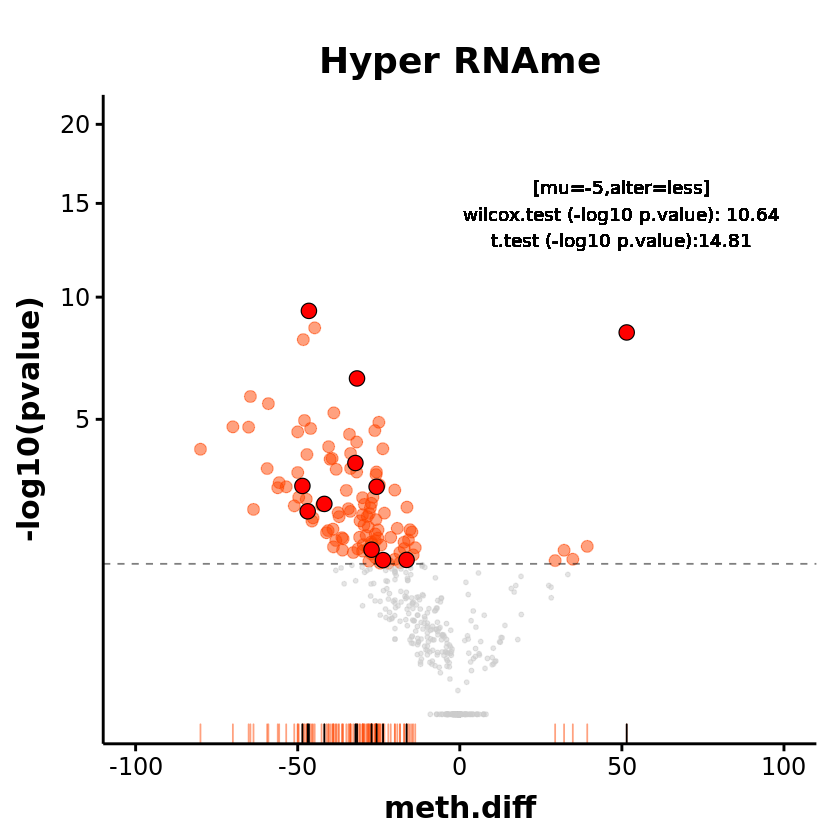

In [888]:
smaller_volcano(RNAme_hyper,'Hyper RNAme')

In [881]:
res_promoters[res_promoters$symbol %in% RNAme_hypo,] %>% filter(
                abs(meth.diff) >= meth.diff.cutoff, 
                pvalue < pvalue.cutoff)

chr,start,end,strand,pvalue,qvalue,meth.diff,symbol,tss,tss.strand,distance
<fct>,<int>,<int>,<fct>,<dbl>,<dbl>,<dbl>,<chr>,<int>,<chr>,<int>
chr10,74824001,74825000,*,2.233586e-03,0.019031620,-28.97959,KAT6B,74825255,+,1254
chr11,46363001,46364000,*,2.680956e-03,0.021659196,-30.68259,DGKZ,46361606,+,-1395
chr16,1475001,1476000,*,4.921779e-05,0.001289778,58.21549,CLCN7,1475028,-,-27
chr17,78171001,78172000,*,2.761115e-02,0.104334287,-22.74510,SYNGR2,78168581,+,-2420


In [882]:
# smaller_volcano(RNAme_hypo)

In [883]:
            # geom_label_repel(
            #     data = res %>% filter(name %in% labels),
            #     size=2, 
            #     segment.colour = "black",
            #     aes(label = name), 
            #     color = 'grey10',fill='white',
            #     box.padding = 1, max.overlaps = Inf) + 
            # scale_color_manual(values = c("grey50", "green4")) +


### sensitivity

In [884]:
sensitivity = c(
"AMBRA1","APCS","API5","ARGLU1","ARHGAP30","ARID4A","ARIH1","ATF7IP","BCL2","BLM","BRMS1","C16orf82","C6orf57",
    "CCAR1","CCDC125","CCDC22","CCDC53","CENPB","CHRM5","CHTOP","CIB4","CMTR2","COL4A5","COMMD1","COMMD2","COMMD4",
    "CP","CSDE1","CSNK1A1","CSNK2A1","CTDSPL2","CTPS1","CXXC4","CYLD","DCP2","DDA1","DDX17","DEF6","DEFB125","DET1",
    "DNAJA2","DYNLRB1","EIF3M","ERCC2","FAF2","FAM58A","FIBP","FZR1","GPATCH8","GPR162","GRB10","HNRNPM","ILF3","INO80E",
    "INTS5","KDM1A","KIAA0195","KIAA0196","LHFPL5","LSM14A","MARK3","MED23","METTL9","MON2","MSN","MTF1","NANS","NOP58",
    "NPRL3","PCBP1","PPP2R1A","PPP6C","PRKRIR","PTEN","PTPN7","PUM1","RAB5C","RABEP1","RALGAPB","RASA2","RASA3","RBBP4",
    "RBM14","RBM14-RBM4","RBM5","REG3G","RFC1","RGS19","RHOA","RNF4","SAMD1","SAP130","SCAF1","SCAF8","SDHAF1","SERF2",
    "SFPQ","SIN3A","SNRPB2","SOCS5","SQLE","SS18","SUPT20H","SYVN1","TAF6L","TBC1D22B","TBRG1","TCERG1","TFRC","TONSL",
    "TOP1","TPTE2","TRIB1","TTC39C","USP22","YTHDC1","ZC3H12D","ZC3H18","ZMYM2"
)

Warning message in if (x_lim == FALSE) {:
“the condition has length > 1 and only the first element will be used”
Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.



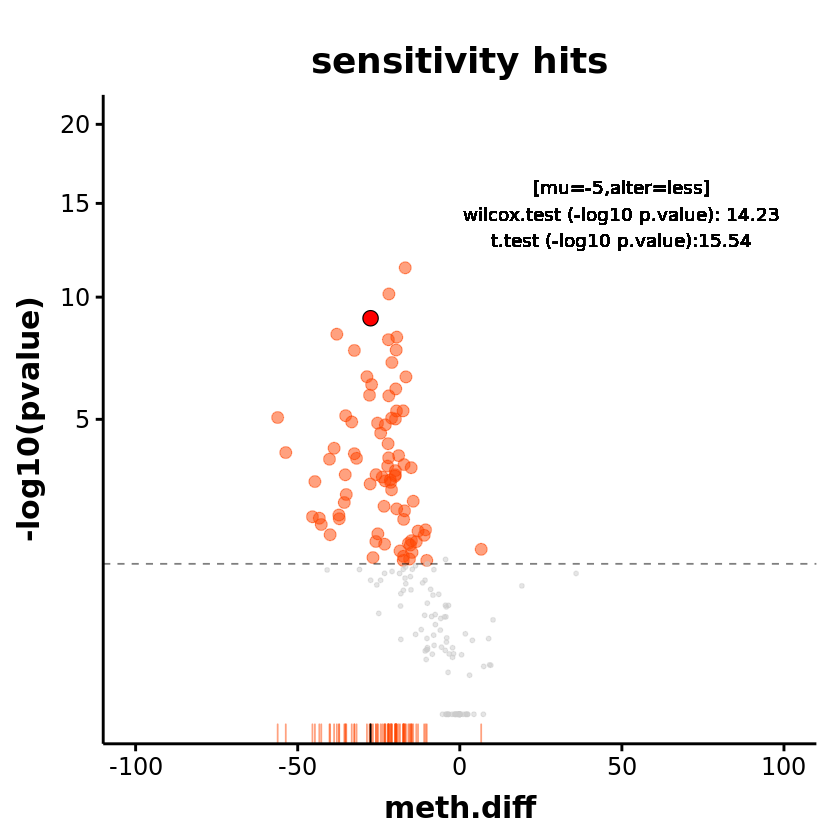

In [889]:
smaller_volcano(sensitivity,'sensitivity hits')

### resistance

In [860]:
resistance = c(
    "ABHD17A","ACACA","ADAP1","ALG13","ALKBH8","ARL1","ARL2","ATP6V1E2","BCLAF1","BLOC1S3","BRAF","BRD8",
    "C14orf166","C14orf2","C16orf59","CARM1","CBLL1","CCDC134","CCDC6","CCNH","CDK2","CDK7","CENPF","CERS2",
    "CHORDC1","CPD","CSRP2BP","DCK","DCTD","DENR","DHX36","DMAP1","DPF2","EEF1E1","EIF5","ELL","ELP3","ELP5",
    "EP400","EPC1","EPC2","FAM122A","G3BP1","GIT2","GLS","HAUS1","HEATR6","HSD17B12","HSP90B1","HYOU1","IPO13",
    "KIAA1429","KIAA1731","KTI12","LARS2","MAP2K2","MARS","MEAF6","METTL3","MKI67","MRGBP","MRPL34","MRPL41","MRPS17",
    "NCK1","NR2C2AP","PDCL","PET117","PHF20","PITRM1","POLR1D","POLR3B","POLR3F","PPP1R18","PPP1R2","PREX1","PRMT7",
    "PTPLB","RAB3GAP2","RAC2","RANBP3","RAP1GDS1","RHOQ","RNFT1","SHOC2","SLC25A1","SMARCAD1","SNRNP40","SNX15","SRSF11"
    ,"TBCA","TELO2","THAP11","TRPM7","TTI2","VARS2","VPS29","VPS51","VPS54","VWA1","YARS2","YTHDF2","ZC3H13","ZCRB1"

)

Warning message in if (x_lim == FALSE) {:
“the condition has length > 1 and only the first element will be used”
Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.



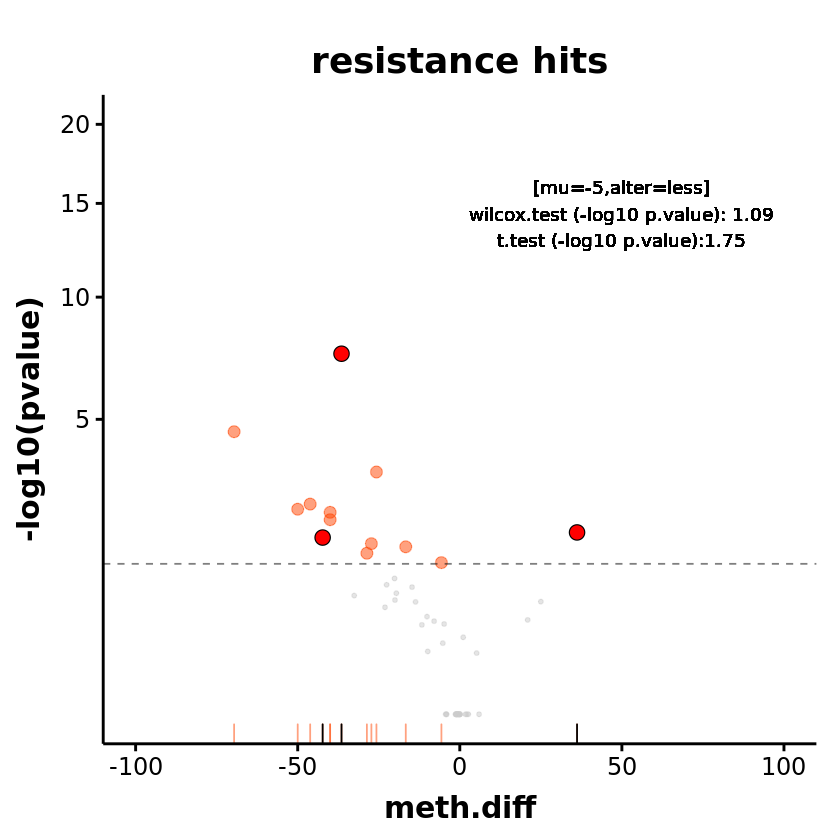

In [890]:
smaller_volcano(resistance,'resistance hits')

#### 

In [842]:
data = myDiff_tiles_ann %>% mutate(
    label = case_when(
        myDiff_tiles_ann$symbol %in% RNAme_hyper ~ 'RNAme_hyper',
        myDiff_tiles_ann$symbol %in% RNAme_hypo ~ 'RNAme_hypo', 
        TRUE ~ ''
    )) 

Warning message:
“Removed 4685 rows containing missing values (geom_point).”
Warning message:
“Removed 165 rows containing missing values (geom_point).”


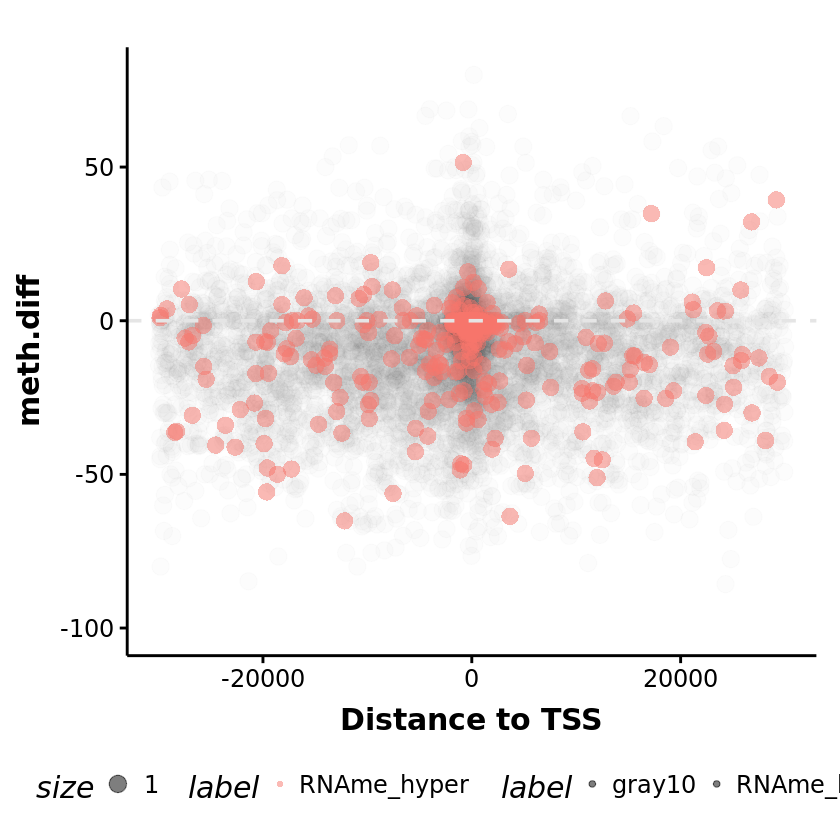

In [844]:
# rbind(
#     lowess(data$distance[data$label =='RNAme_hyper'],data$meth.diff[data$label =='RNAme_hyper'], f=.4) %>% data.frame %>% mutate(label='RNAme_hyper'),
#     lowess(data$distance[data$label ==''],data$meth.diff[data$label ==''], f=.01) %>% data.frame %>% mutate(label='')
# )
data %>%
    ggplot(aes(x=distance, y=meth.diff,fill=label)) + 
    geom_point(
        data=data, 
        aes(x=distance, y=meth.diff,fill='gray10',size=1),alpha=.01) + 
    geom_point(
        data=data %>% dplyr::filter(label %in% c('RNAme_hyper')), 
        aes(x=distance, y=meth.diff,colour=label,shape=label,size=1),alpha=.5) + 
    # geom_smooth(aes(colour=label), span = 10,method='lm') + 
    xlab("Distance to TSS") + 
    # ylim(-100,50) + 
    geom_hline(yintercept=0, linetype="dashed", color = "gray90", size=1) +
    xlim(-10**4*3,10**4*3) + 
    # facet_wrap(~label) +
    theme_Publication()    


In [494]:
#      geom_point(data,
#         aes(x = meth.diff, y = -log10(pvalue),colour=label),
#         shape = 21, size = 3#, color = "black", fill = "red1"
#     # )# + geom_rug(data,
#     #     sides = "b", colour= 'red1'
#     # )
# # ggsave('diff-DNAme-volcano.pdf',width=8,height=7)

# res_promoters %>% dplyr::filter(pvalue < pvalue.cutoff, meth.diff > meth.diff.cutoff) %>% dplyr::select(symbol) %>% unique

# lowess(data$distance[keep], data$meth.diff[keep], f=0.1) 


# %>% filter(abs(meth.diff) >= meth.diff.cutoff, pvalue < pvalue.cutoff)

### CRISPRi

In [655]:
# 'METTL14','WTAP','KIAA1429','RBM15','RBM15B','METTL16','FTO','ALKBH5','YTHDC1','YTHDF1','YTHDF2','YTHDF3','HNRNPA2B1','EIF3','HNRNPC'

In [ ]:
'METTL14','WTAP','KIAA1429','RBM15','RBM15B','METTL16','FTO','ALKBH5','YTHDC1','YTHDF1','YTHDF2','YTHDF3','HNRNPA2B1','EIF3','HNRNPC'

#### Prepare genome annotations 
https://support.bioconductor.org/p/126514/

In [ ]:
# gtf = gffToGRanges(GTF)

In [273]:
# BED12 = '~/genomes/hg38/gencode.v34/gencode.v34.annotation.bed'
# GTF = '~/genomes/hg38/gencode.v34/gencode.v34.annotation.gtf'
# gtf <- rtracklayer::import(GTF)
# gene2name <- gtf[gtf$type == "gene"] %>% data.frame %>% 
#     column_to_rownames('gene_id') %>% 
#     dplyr::select('gene_name')

In [272]:
# txdb  = GenomicFeatures::makeTxDbFromGFF(GTF,organism='Homo sapiens')
# # tx2gene objects 
# k <- keys(txdb, keytype = "TXNAME")
# tx2gene <- AnnotationDbi::select(txdb, k, "GENEID", "TXNAME")

In [119]:
# tx2gene <- tx2gene %>% column_to_rownames('TXNAME')

In [120]:
# export.bed12(GRangesList(gtf), BED12)

In [46]:
# len = 1000
# promoters.data <- promoters(txdb, upstream=len, downstream=len)
# promoters.data$gene_name = gene2name[tx2gene[promoters.data$tx_name,],]

In [275]:
# gtf2 = gtf[gtf$gene_name %in% res2$symbol]
# # an end that is greater or equal to its start minus one
# gtf2 = gtf2[end(gtf2) > (start(gtf2))]

In [274]:
# gtf2$type %>% unique

In [276]:
# export.bed12(GRangesList(gtf2), 'methylKit/gene_annotation.bed')

#### Annotating differentially methylated bases or regions

In [131]:
gene.obj = readTranscriptFeatures('methylKit/gene_annotation.bed')

Reading the table...

Calculating intron coordinates...



ERROR: Error in .width_as_unnamed_integer(width, msg = "an end that is greater or equal to its start minus one"): each range must have an end that is greater or equal to its start minus
  one


In [ ]:
annotateWithGeneParts(as(myDiffTop,"GRanges"),gene.obj)

#### Regional analysis


> We can also summarize methylation information over a set of defined regions such as promoters or CpG islands. The function below summarizes the methylation information over a given set of promoter regions and outputs a methylRaw or methylRawList object depending on the input. We are using the output of genomation functions used above to provide the locations of promoters. For regional summary functions, we need to provide regions of interest as GRanges object.


In [ ]:
promoters=regionCounts(myobj,gene.obj$promoters)

head(promoters[[1]])


#### Convenience functions for annotation objects


In [ ]:
diffAnn=annotateWithGeneParts(as(myDiff25p,"GRanges"),gene.obj)

# target.row is the row number in myDiff25p
head(getAssociationWithTSS(diffAnn))


In [ ]:
getTargetAnnotationStats(diffAnn,percentage=TRUE,precedence=TRUE)


In [ ]:
plotTargetAnnotation(diffAnn,precedence=TRUE,
    main="differential methylation annotation")


In [ ]:
plotTargetAnnotation(diffCpGann,col=c("green","gray","white"),
       main="differential methylation annotation")


In [ ]:
getFeatsWithTargetsStats(diffAnn,percentage=TRUE)

In [ ]:
sm = ScoreMatrix(target = cage, windows = promoters)

heatMatrix(sm, xcoords = c(-1000, 1000))
plotMeta(sm, xcoords = c(-1000, 1000))


In [143]:
myDiffTop_ann

,chr,start,end,strand,pvalue,qvalue,meth.diff,gene_id,symbol,width,tss,tss.strand,distance
,<chr>,<int>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<int>,<int>,<chr>,<int>
1,chr1,976414,976414,+,0.3428571429,0.80424402,8.333333,84808,PERM1,5976,981173,-,-4759
2,chr1,976423,976423,+,0.3888888889,0.80506099,7.142857,84808,PERM1,5976,981173,-,-4750
4,chr1,1045054,1045054,+,0.3064292030,0.76776114,-19.473684,375790,AGRN,22122,1033993,+,-11061
5,chr1,1045059,1045059,+,0.0295566502,0.29464104,-30.000000,375790,AGRN,22122,1033993,+,-11066
6,chr1,1070497,1070497,+,0.0099636655,0.20435077,-45.714286,105378948,LOC105378948,3703,1069337,-,1160
7,chr1,1070525,1070525,+,0.0519557424,0.37526059,-30.000000,105378948,LOC105378948,3703,1069337,-,1188
10,chr1,1136847,1136847,-,0.5329670330,0.80506099,-16.666667,254099,LINC01342,7038,1137017,+,170
12,chr1,1297790,1297790,+,0.1108374384,0.51100709,-20.000000,102465434,MIR6726,61,1296170,-,1620
15,chr1,1376595,1376595,+,0.5096774194,0.80506099,-10.526316,54998,AURKAIP1,1472,1375207,-,1388


### Correlate with RNA-seq profiles

In [ ]:
> load("rna.RData")
> dim(y_rna)
> haveME <- row.names(y_rna) %in% row.names(ypr)
> y_rna <- y_rna[haveME,]
> dim(y_rna)
> fitrna <- glmFit(y_rna)
> Contrastrna <- makeContrasts(L.virgin-B.virgin, levels=y_rna$design)
> lrtrna <- glmLRT(fitrna, contrast=Contrastrna)
# Correlate methylation and expression
> topME$logFC.RNA <- lrtrna$table[row.names(topME),"logFC"]
> topME[1:30,c("Symbol","logFC","logFC.RNA")]

> plot(topME$logFC, topME$logFC.RNA, main="Lumina vs Basal",
+      xlab="Methylation logFC", ylab="Expression logFC",
+      pch=16, cex=0.8, col="gray30")
> abline(h=0, v=0, col="gray10", lty=2, lwd=2)


> Figure 8. Scatter plot of the log-fold-changes of methylation levels in gene promoters (x-axis) vs the log fold-changes of gene expression (y-axis).


In [ ]:
> RNAvsME <- lm(topME$logFC.RNA ~ 0 + topME$logFC)
> coef(summary(RNAvsME))

            Estimate Std. Error t value Pr(>|t|)
topME$logFC   -0.738     0.0472   -15.7 6.17e-48

> abline(RNAvsME, col="red", lwd=2) 


In [ ]:
# Gene set testing
> ME <- data.frame(ID=row.names(topME), logFC=topME$logFC, stringsAsFactors=FALSE)
> inRNA <- ME$ID %in% row.names(y_rna)
> ME <- ME[inRNA,]
> fry(y_rna, index=ME, contrast=Contrastrna)

> logFC.ME <- rep_len(0,nrow(y_rna))
> names(logFC.ME) <- row.names(y_rna)
> logFC.ME[ME$ID] <- ME$logFC
> barcodeplot(lrtrna$table$logFC, gene.weights=logFC.ME,
+               labels=c("Basal","Luminal"), main="Luminal vs Basal",
+               xlab="Expression logFC", weights.label="Me logFC")
> legend("topright", col=c("red","blue"), lty=1, lwd=2,
+         legend=c("Hypermethylated in Luminal", "Hypomethylated in Luminal"))


___
__Discussion__
> This article has presented a complete start to finish analysis of an RRBS dataset from our own practice. The analysis demonstrates how BS-seq data can be analyzed using software designed for RNA-seq, thus benefiting from a large reservoir of highly-developed RNA-seq methodology. At first sight, BS-seq data is fundamentally different to RNA-seq because of the need to focus on the proportion of methylated reads at each locus rather than on the absolute number of reads at each locus. The link is achieved by conducting the statistical inference conditional on the read coverage at each locus, and this in turn is achieved by including sample-specific locus effects in the linear model.

> We have concentrated on analysing methylation changes for pre-defined genomic regions. At the highest resolution, conducted differential methylation tests for each distinct CpG site. Our main analysis was gene-level, whereby we aggregated counts over a putative promoter region around the TSS for each gene. This gives a “big picture” analysis and facilities a correlation of DM results with differential expression results from RNA-seq for the same cell populations. We also illustrated the use of gene set tests to examine whether there were overall methylation changes at the whole chromosome level.

> The analysis presented here was designed for reduced representation BS-seq and was tuned to our own research interests. While the same analysis approach could be fruitfully applied to WGBS data, researchers with WGBS data may also want to discover DMRs de novo without the use of gene annotation or pre-specified genomic regions, something we haven’t explored in this article. The edgeR approach presented here could in principle be extended to discover DMRs in a de novo fashion using similar methods to those developed for ChIP-seq data41–43.

In [ ]:
> sessionInfo()

# 

In [ ]:
!date